In [1]:
import numpy as np
from scipy import misc
from IPython.display import Image
from IPython.display import display

In [2]:
def averageDistToCenter(X,C):
    avdist = np.sum(np.sqrt(np.sum((X - C)**2,axis=0)),axis=0)
    avdist /= np.maximum(np.size(X,axis=1),1)
    return avdist

def KMeans(K, X, doPrinting=False):
    d = np.size(X,axis=0)
    N = np.size(X,axis=1)
    I = np.eye(K)
    R = X[:,np.random.randint(0,N,K)] #random start centers
    M = np.zeros((d,K)).astype(int)
    changes = True
    iters = 0
    while changes:
#         D = np.sum((R.T[np.newaxis,:,:] - X.T[:,np.newaxis,:])**2., axis=-1).T # distances from centers
        D = -2. * np.dot(X.T,R) + np.sum(R**2,axis=0,keepdims=True)# it is not necessary to add X^2
        m = np.argmin(D, axis=1)
        newM = np.take(I,m,axis=0).astype(int) # matrix of membership
        changes = not np.array_equal(M,newM)
        M = newM
        R = np.dot(X,M)/np.maximum(np.sum(M.T,axis=1),1) # new centers
        iters +=1
    if doPrinting:
        avDistToCenter = np.array([averageDistToCenter(X[:,M[:,i] == 1], R[:,i,np.newaxis]) for i in range(K)])
        groupSizes = np.sum(M.T,axis=1)
        print('Average distance to center within groups:\n',avDistToCenter)
        print("Iterations: ", iters, "\n")
        print("Group sizes: ", groupSizes, "\n")
    return R, M, m

In [3]:
def reducePhoto(K, photo):
    A,B,d = photo.shape
    N = A*B
    data = np.reshape(photo,(N,d)).T
    R, M, m = KMeans(K,data)
    for i in range(K):
        data[:,m==i] = R[:,i,np.newaxis]
    return np.reshape(data.T,(A,B,d))
def compare (K, filePath, filePathOut):
    photo = misc.imread(filePath)
    dt = (photo.dtype)
    print(dt)
    reduced = reducePhoto(K,photo).astype(dt)
    misc.imsave(filePathOut, reduced)
    originalPhoto = Image(filePath)
    reducedPhoto = Image(filePathOut)
    display(originalPhoto,reducedPhoto)

uint8


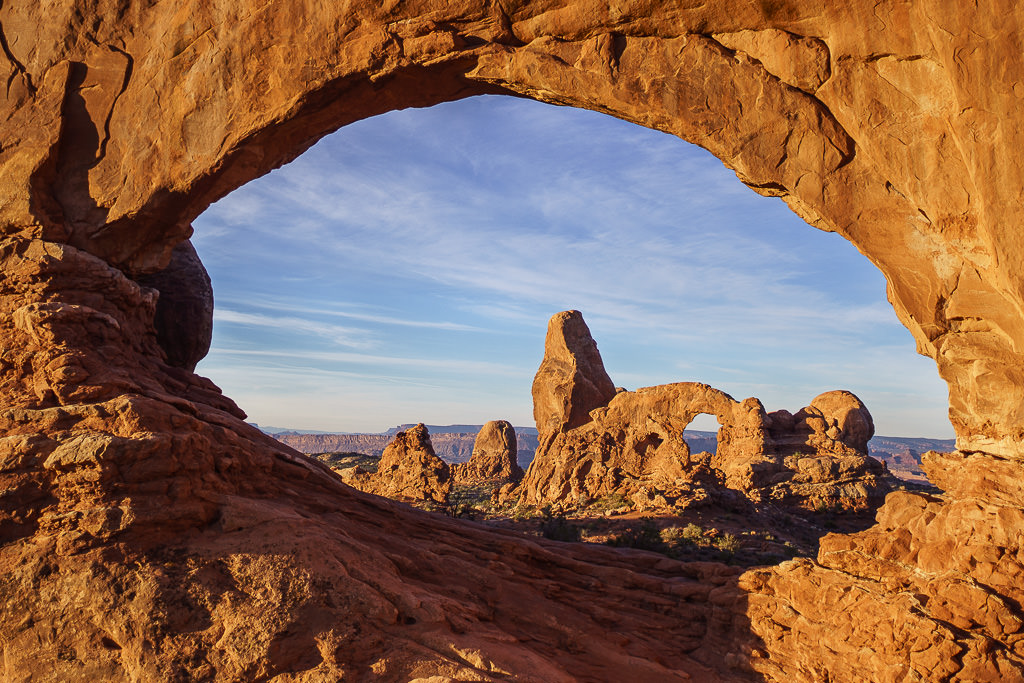

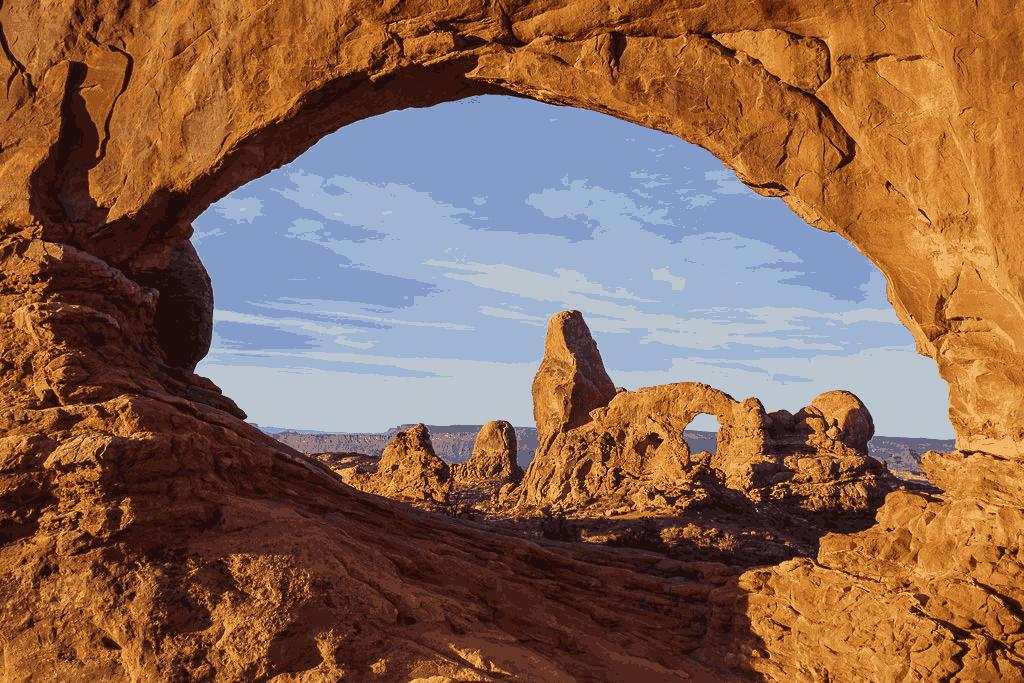

In [37]:
compare(25,'Images/Rock.jpg', 'Images/reducedRock25.jpg')

uint8


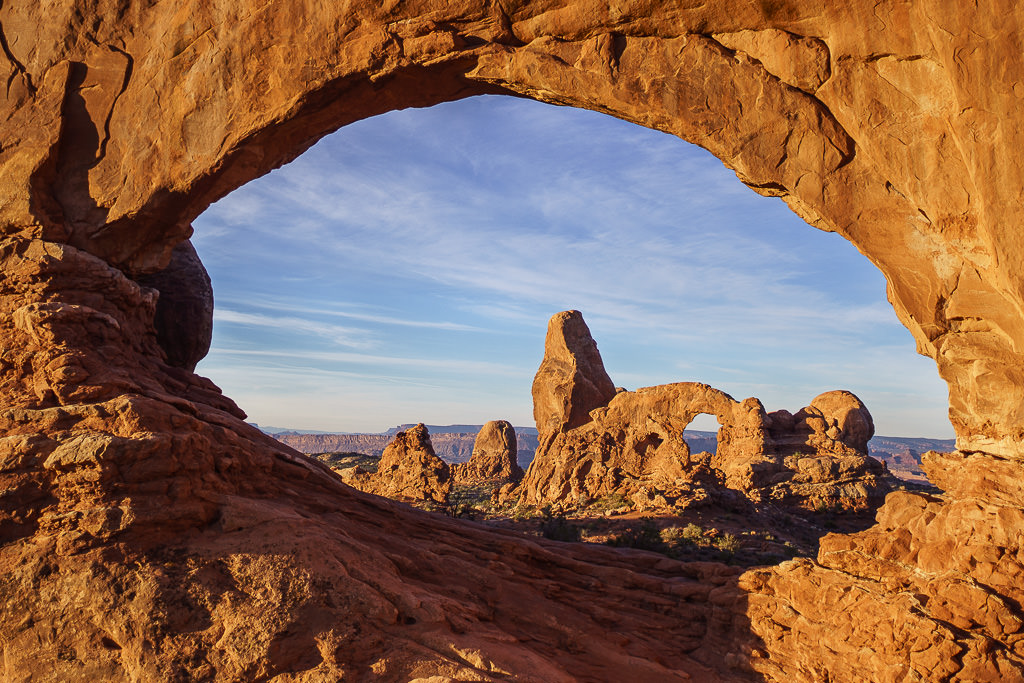

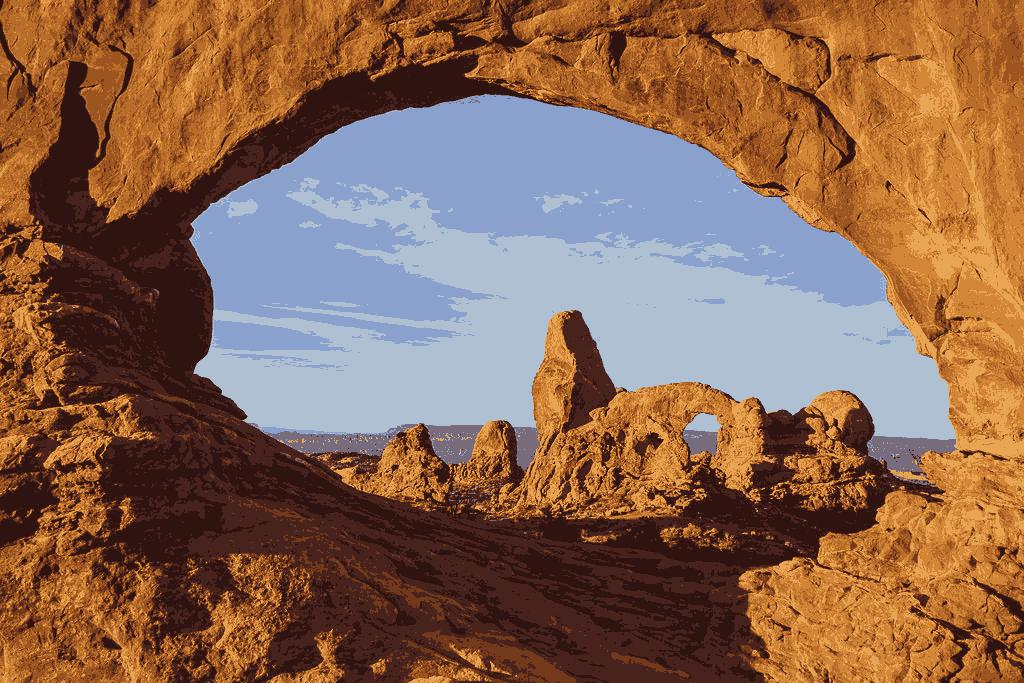

In [38]:
compare(10,'Images/Rock.jpg', 'Images/reducedRock15.jpg')

uint8


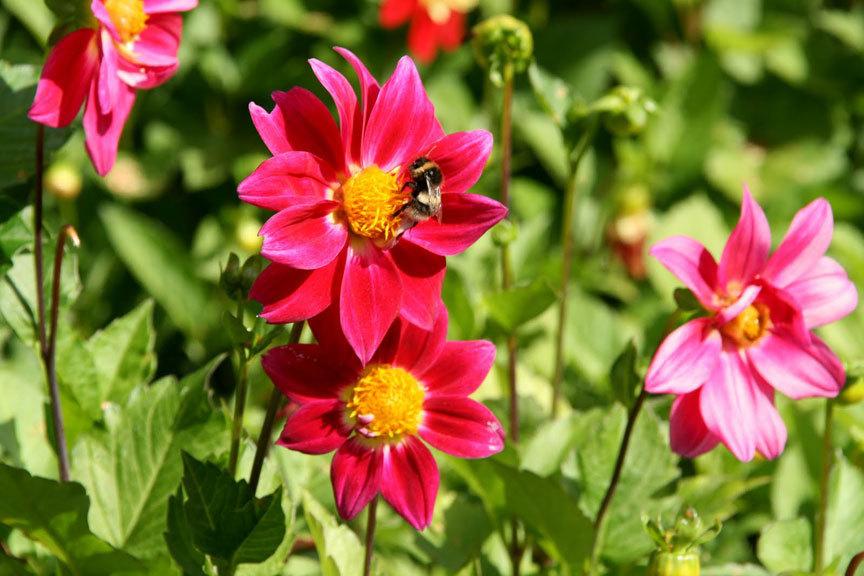

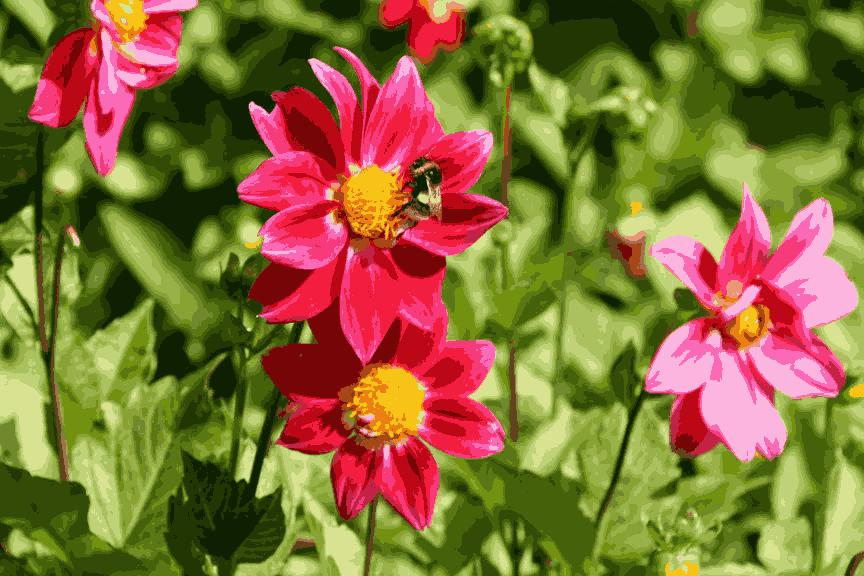

In [39]:
compare(25,'Images/Flower.jpg', 'Images/reducedFlower25.jpg')

uint8


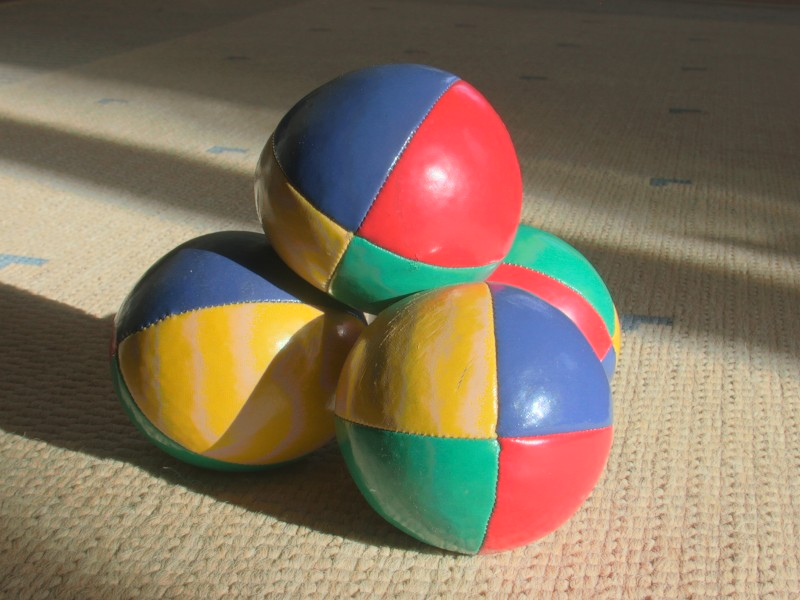

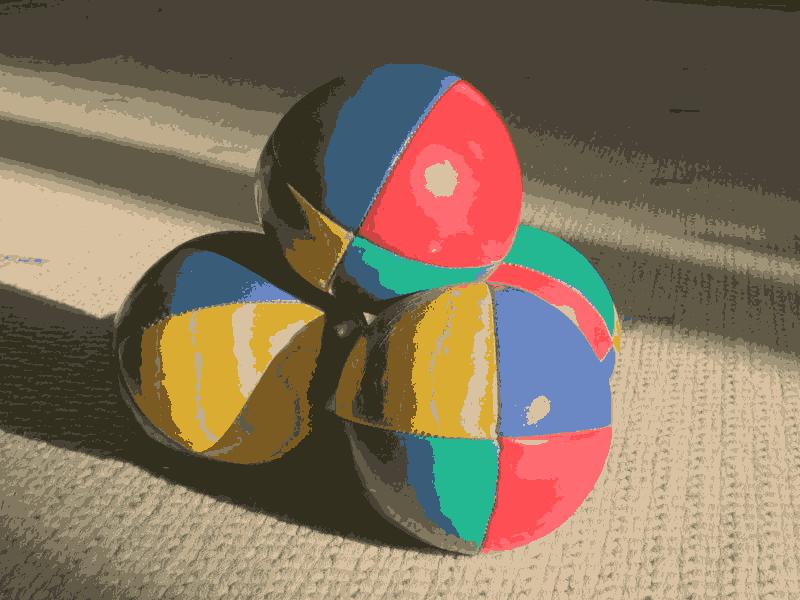

In [40]:
compare(15,'Images/Balls.jpg', 'Images/reducedBalls15.jpg')

uint8


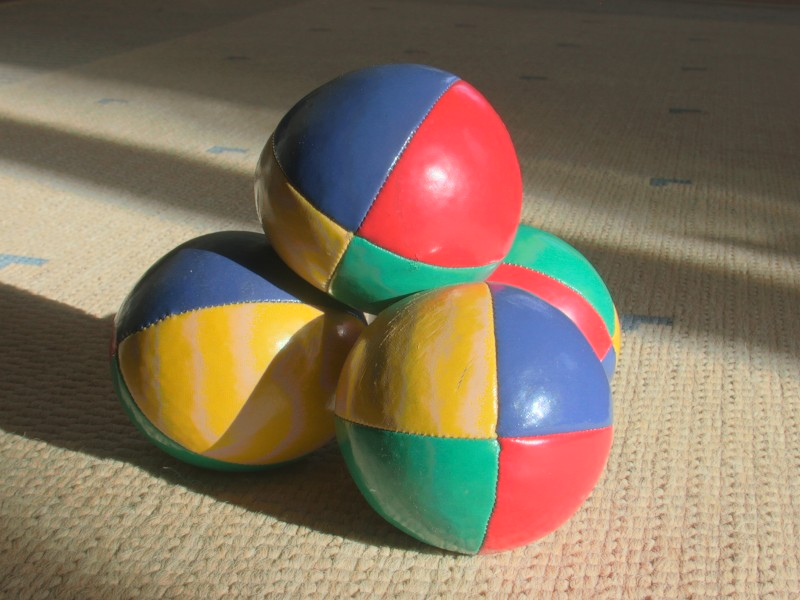

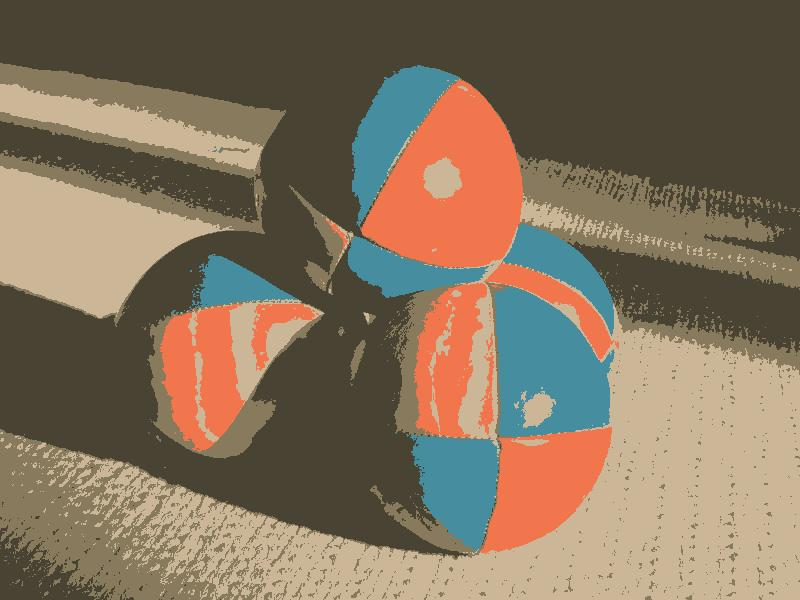

In [41]:
compare(5,'Images/Balls.jpg', 'Images/reducedBalls5.jpg')

uint8


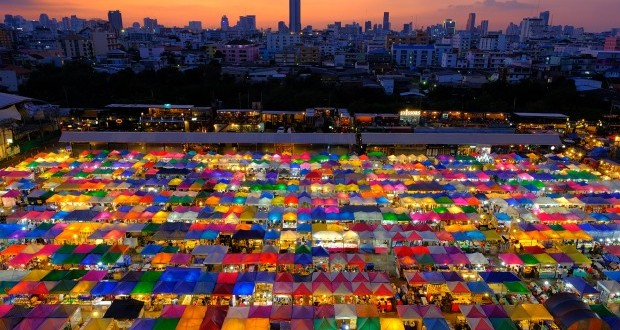

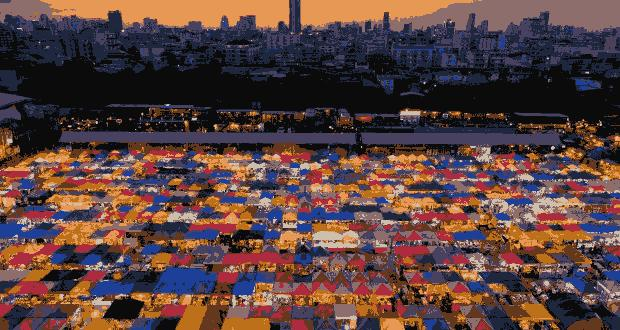

In [42]:
compare(10,'Images/Colors.jpg', 'Images/reducedColors10.jpg')

uint8


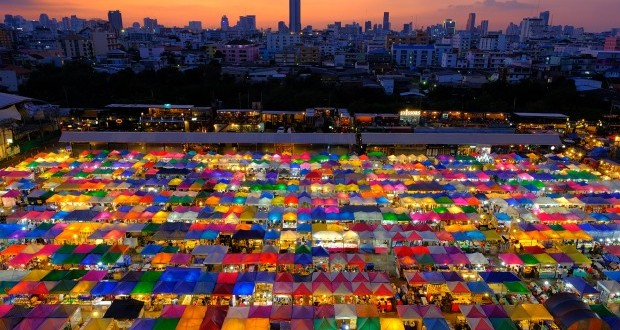

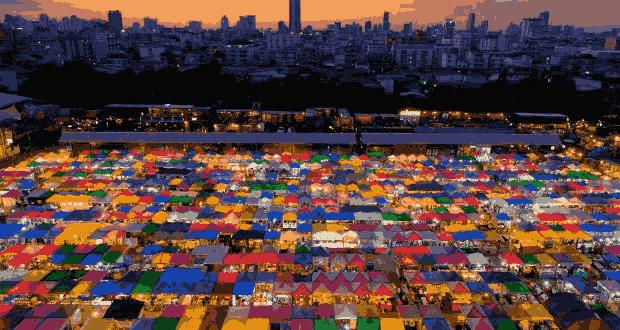

In [43]:
compare(20,'Images/Colors.jpg', 'Images/reducedColors20.jpg')

uint8


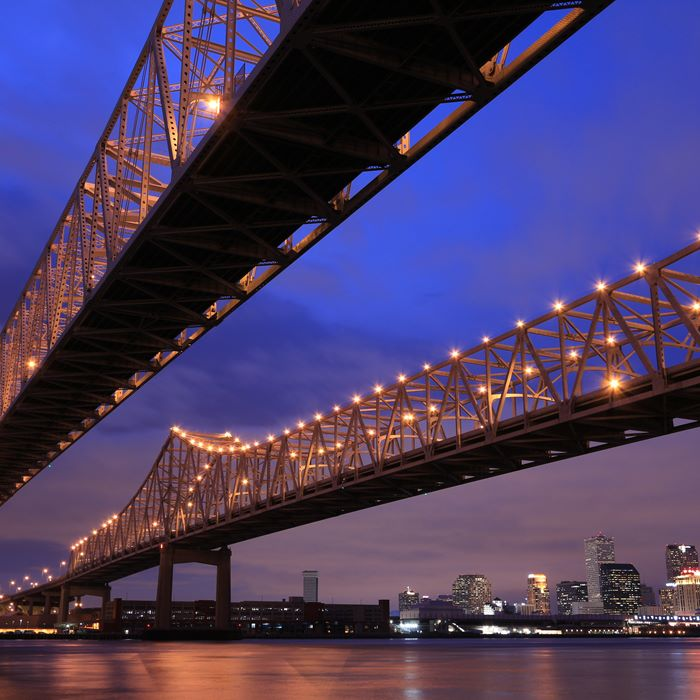

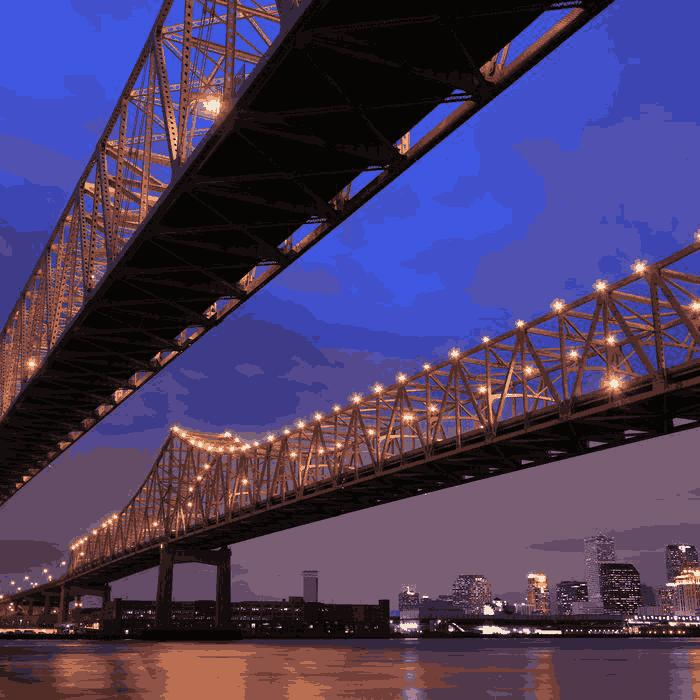

In [4]:
compare(20,'Images/Bridge.jpg', 'Images/reducedBridge20.jpg')

uint8


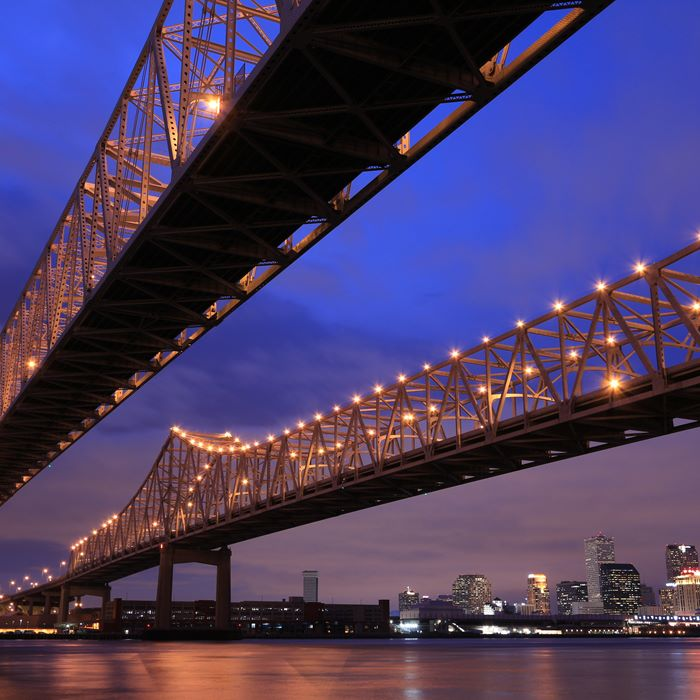

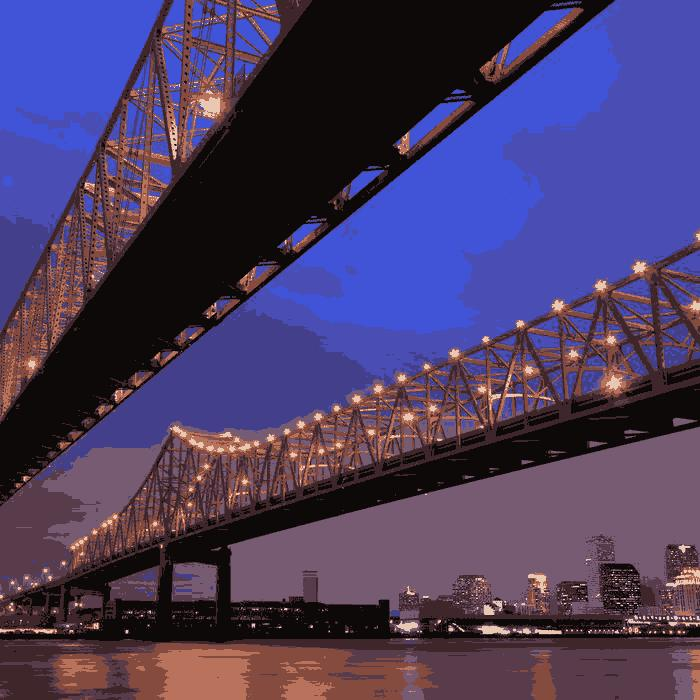

In [5]:
compare(10,'Images/Bridge.jpg', 'Images/reducedBridge10.jpg')